In [147]:
import spacy
import random
import pandas as pd
#import numpy as np
#import textacy
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12 ,6)

In [2]:
nlp = spacy.load('en_core_web_lg')

# Analysis of time words according to their positions in chapters

Use named entity recognition (SpaCy) to find occurrences of time expressions and date expressions in a previously-generated corpus consisting of first paragraphs of chapters, middle paragraphs of chapters, and last parargraphs of chapters. 

Here I'm randomly sampling 1000 lines from each text file, where each line represents a paragraph (first paragraph of a chapter, middle paragraph of a chapter, or last paragraph of a chapter). This is just because SpaCy tends to compute everything at once, and quickly runs out of memory if this number is much larger.

In [17]:
def loadAndSample(filename): 
    raw = open(filename).read().split('\n')
    sample = random.sample(raw, 1000)
    return '\n'.join(sample)

In [18]:
filenames = ['chaps-firstParas.txt', 'chaps-midParas.txt', 'chaps-lastParas.txt']

This is the main loop. Since I randomly sample from these text files, I run this loop multiple times, and take the average of all trials in the end. I also truncate each text to the length of the smallest here, ensuring even probabilities for all three categories. Last paragraphs of chapters are usually the shortest. 

In [218]:
def iterate():
    rawTexts = [loadAndSample(t) for t in filenames]
    lengths = [len(t) for t in rawTexts]
    print("Lengths after sampling: ", lengths)
    rawTexts = [t[:min(lengths)] for t in rawTexts]
    print("Lengths after truncating: ", [len(t) for t in rawTexts])
    dates, times = [], []
    for t in rawTexts: 
        date, time = extractDatesAndTimes(t)
        dates.append(date)
        times.append(time)
    numDates = [len(d) for d in dates]
    months = [categorizeByMonth(d) for d in dates]
    return months, times, numDates

In [219]:
def extractDatesAndTimes(text): 
    doc = nlp(text)
    dates = [e.text for e in doc.ents if e.label_ == "DATE"]
    times = [e.text for e in doc.ents if e.label_ == "TIME"]
    return dates, times

In [105]:
# Categorize them
# By month
def categorizeByMonth(dates): 
    months = ["January", "February", "March", "April", "May",
             "June", "July", "August", "September", "October", 
             "November", "December"]
    #monthDict = OrderedDict([(month, 0) for month in months])
    monthDict = {month: 0 for month in months}
    for date in dates:
        for month in months:
            if month in date:
                monthDict[month] += 1
    return monthDict

In [211]:
def categorizeByTime(times):
    catsTimes = []
    for cat in times:
        timesDict = {exp: 0 for exp in timeExpressions}
        for time in cat: 
            for exp in timeExpressions:
                if exp in time:
                    timesDict[exp] += 1
        catsTimes.append(timesDict)
    return catsTimes 

In [49]:
trials = []

In [106]:
monthTrials = []

In [173]:
timeTrials = []

In [243]:
months, times, numDates = iterate()
trials.append(numDates)
monthTrials.append(months)
timeTrials.append(times)
#pd.Series(numDates, index=["first", "middle", "last"]).plot(kind="bar")

Lengths after sampling:  [620110, 1470599, 376003]
Lengths after truncating:  [376003, 376003, 376003]


In [210]:
numberWords = ["one", "two", "three", "four", "five", "six", "seven", "eight", 
             "nine", "ten", "eleven", "twelve"]
timeExpressions = [w + " o'clock" for w in numberWords]
timeExpressions += "noon", "midnight"
timeExpressions += "dawn", "morning", "afternoon", "evening", "dusk", "night"

## How many date expressions appear in each category? 
(Categories are: first paragraphs of chapters, middle paragraphs of chapters, last paragraphs of chapters.)

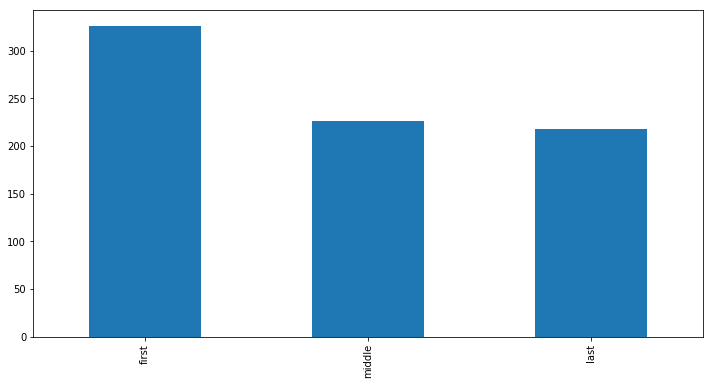

In [244]:
df = pd.DataFrame(trials, columns=["first", "middle", "last"])
df.mean().plot(kind="bar")

## Which time expressions appear in each category? 

In [245]:
timeDf = pd.DataFrame([categorizeByTime(time) for time in timeTrials])

In [246]:
averageTimes = averageMonthTrials(timeDf)

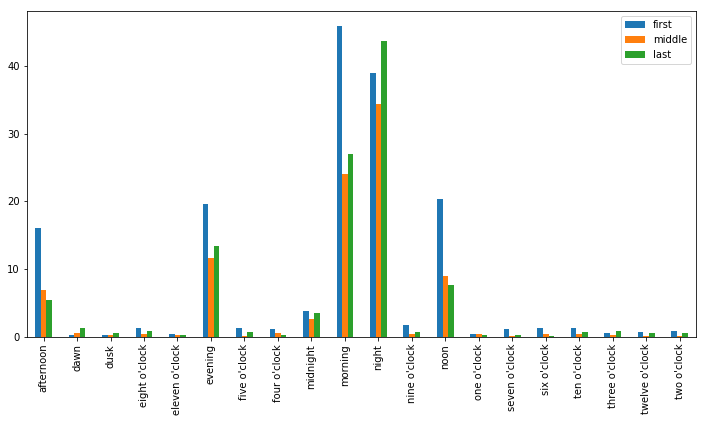

In [247]:
timeAvgDf = pd.DataFrame(averageMonthTrials(timeDf))
timeAvgDf.columns = ["first", "middle", "last"]
timeAvgDf.plot(kind="bar")

Let's look at slices of this data, since the small ones are hard to read. First, only clock times:

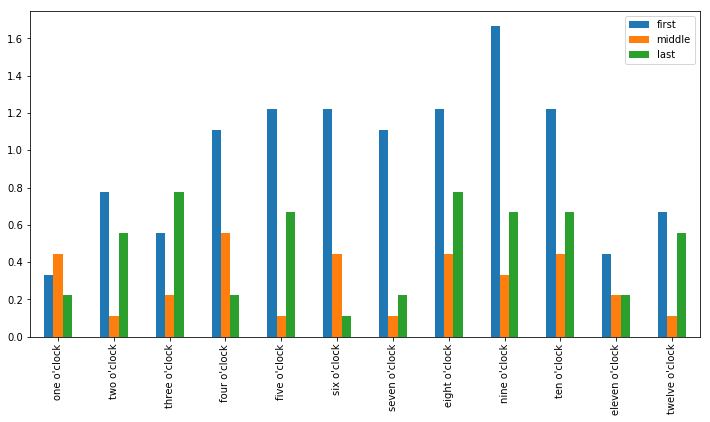

In [248]:
timeAvgDf.loc[timeExpressions[:-8]].plot(kind="bar")

Again, but stacked:

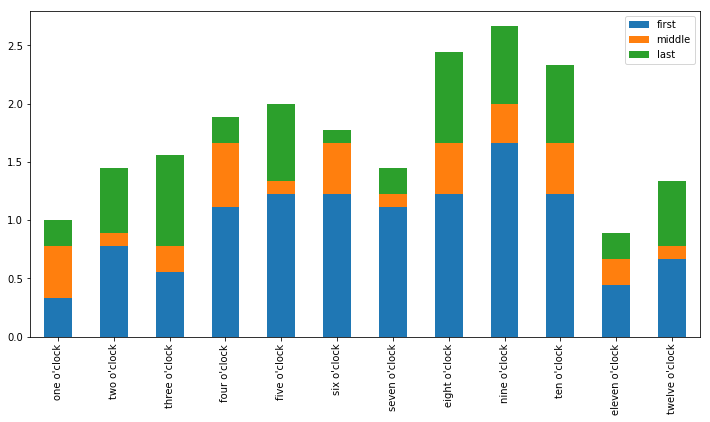

In [249]:
timeAvgDf.loc[timeExpressions[:-8]].plot(kind="bar", stacked=True)

Next, more general times of day: 

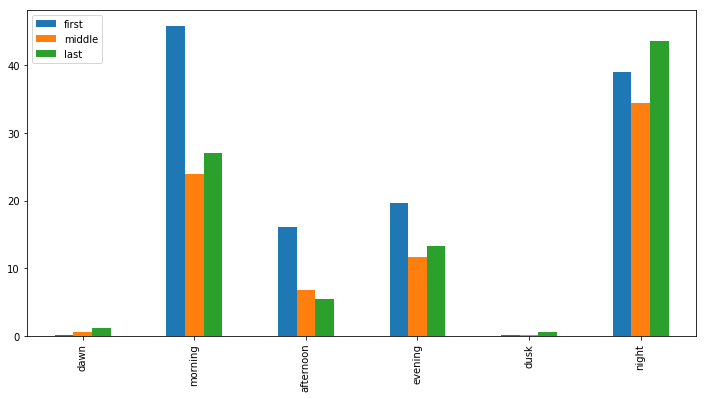

In [250]:
timeAvgDf.loc[timeExpressions[-6:]].plot(kind="bar")

That same data again, but stacked, to show overall totals: 

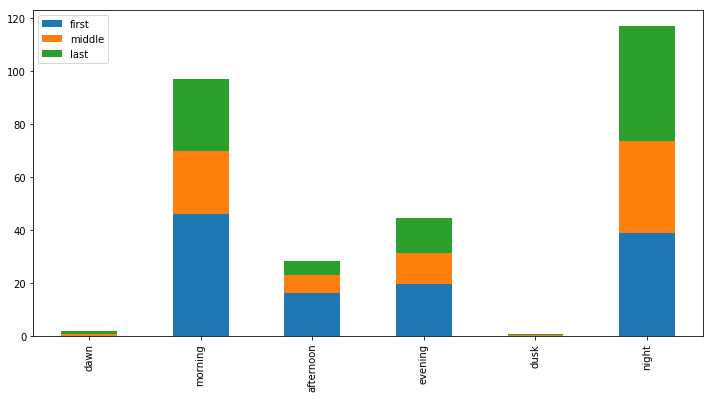

In [251]:
timeAvgDf.loc[timeExpressions[-6:]].plot(kind="bar", stacked=True)

What's happening with just "dawn" and "dusk"? 

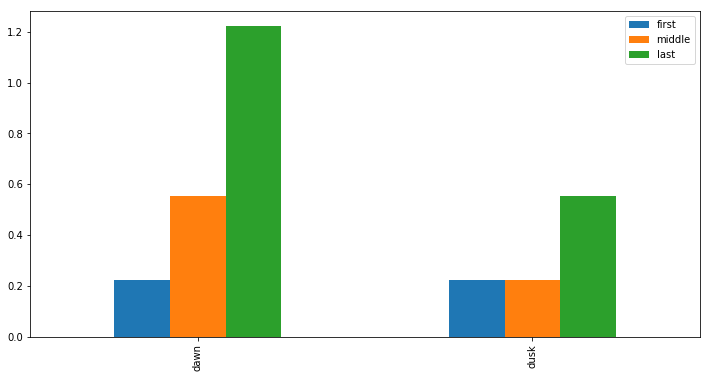

In [252]:
timeAvgDf.loc[["dawn", "dusk"]].plot(kind="bar")

## Months

In [253]:
def averageMonthTrials(monthTrials):
    monthDf = pd.DataFrame(monthTrials)
    averages = {}
    for i in range(len(monthDf.columns)):
        df = pd.DataFrame(monthDf[i].to_dict())
        averages[i] = df.mean(axis=1)
    return averages

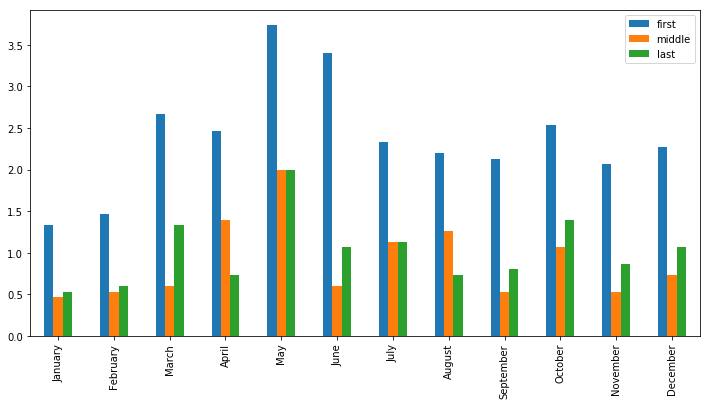

In [254]:
df = pd.DataFrame(averageMonthTrials(monthTrials))
df.columns = ["first", "middle", "last"]
months = ["January", "February", "March", "April", "May",
             "June", "July", "August", "September", "October", 
             "November", "December"]
df = df.reindex(months)
df.plot(kind='bar')

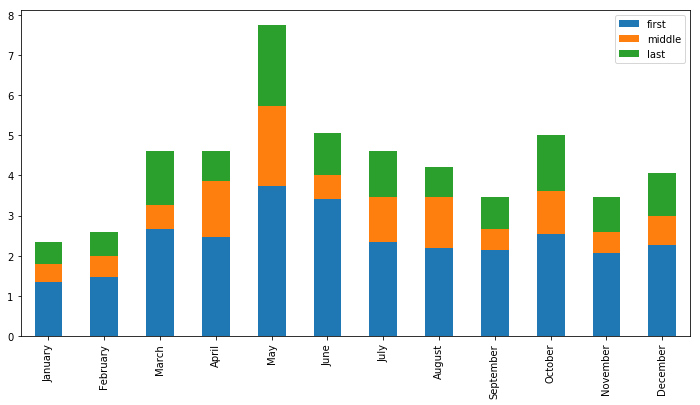

In [255]:
df.plot(kind="bar", stacked=True)